In [1]:
!pip install BeautifulSoup4
!pip install geopy
!pip install -U scikit-learn scipy matplotlib
!pip install seaborn
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
!pip install lxml

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
import folium # map rendering library
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x

### Countries by Inflows of foreign population(International Migration Database)

In [5]:
migration_data_url = 'https://gist.githubusercontent.com/zeneep/a08496141a01d9107d79d5c940870993/raw/f7a14f8129222421760cff080210234c497b14be/migration_index_country_stats_oecd_org.csv'

migration_df = pd.read_csv(migration_data_url)


In [6]:
graph_migration_df = migration_df.copy()
graph_migration_df_T = graph_migration_df.set_index('Country',inplace=False).T


# International Migration


*Migration is defined as the change of habitual residence of a person from one territory (country) to another for a period that is expected to be at least 12 months. Thus, when we speak of migration and immigrants, we are referring to people who enter one country and were born or come from another.

The origin-destination relationship of a migrant depends on the personal characteristics of the migrant, such as education, skills, sex, race, personality and aspirations. Generally, people decide to emigrate to prosperous countries close to their own.

               
  
In the table we can see the population of the 34 countries with the highest migration rates from 2001 to 2019, according to ONU data. *



Text(0, 0.5, 'Value in millions')

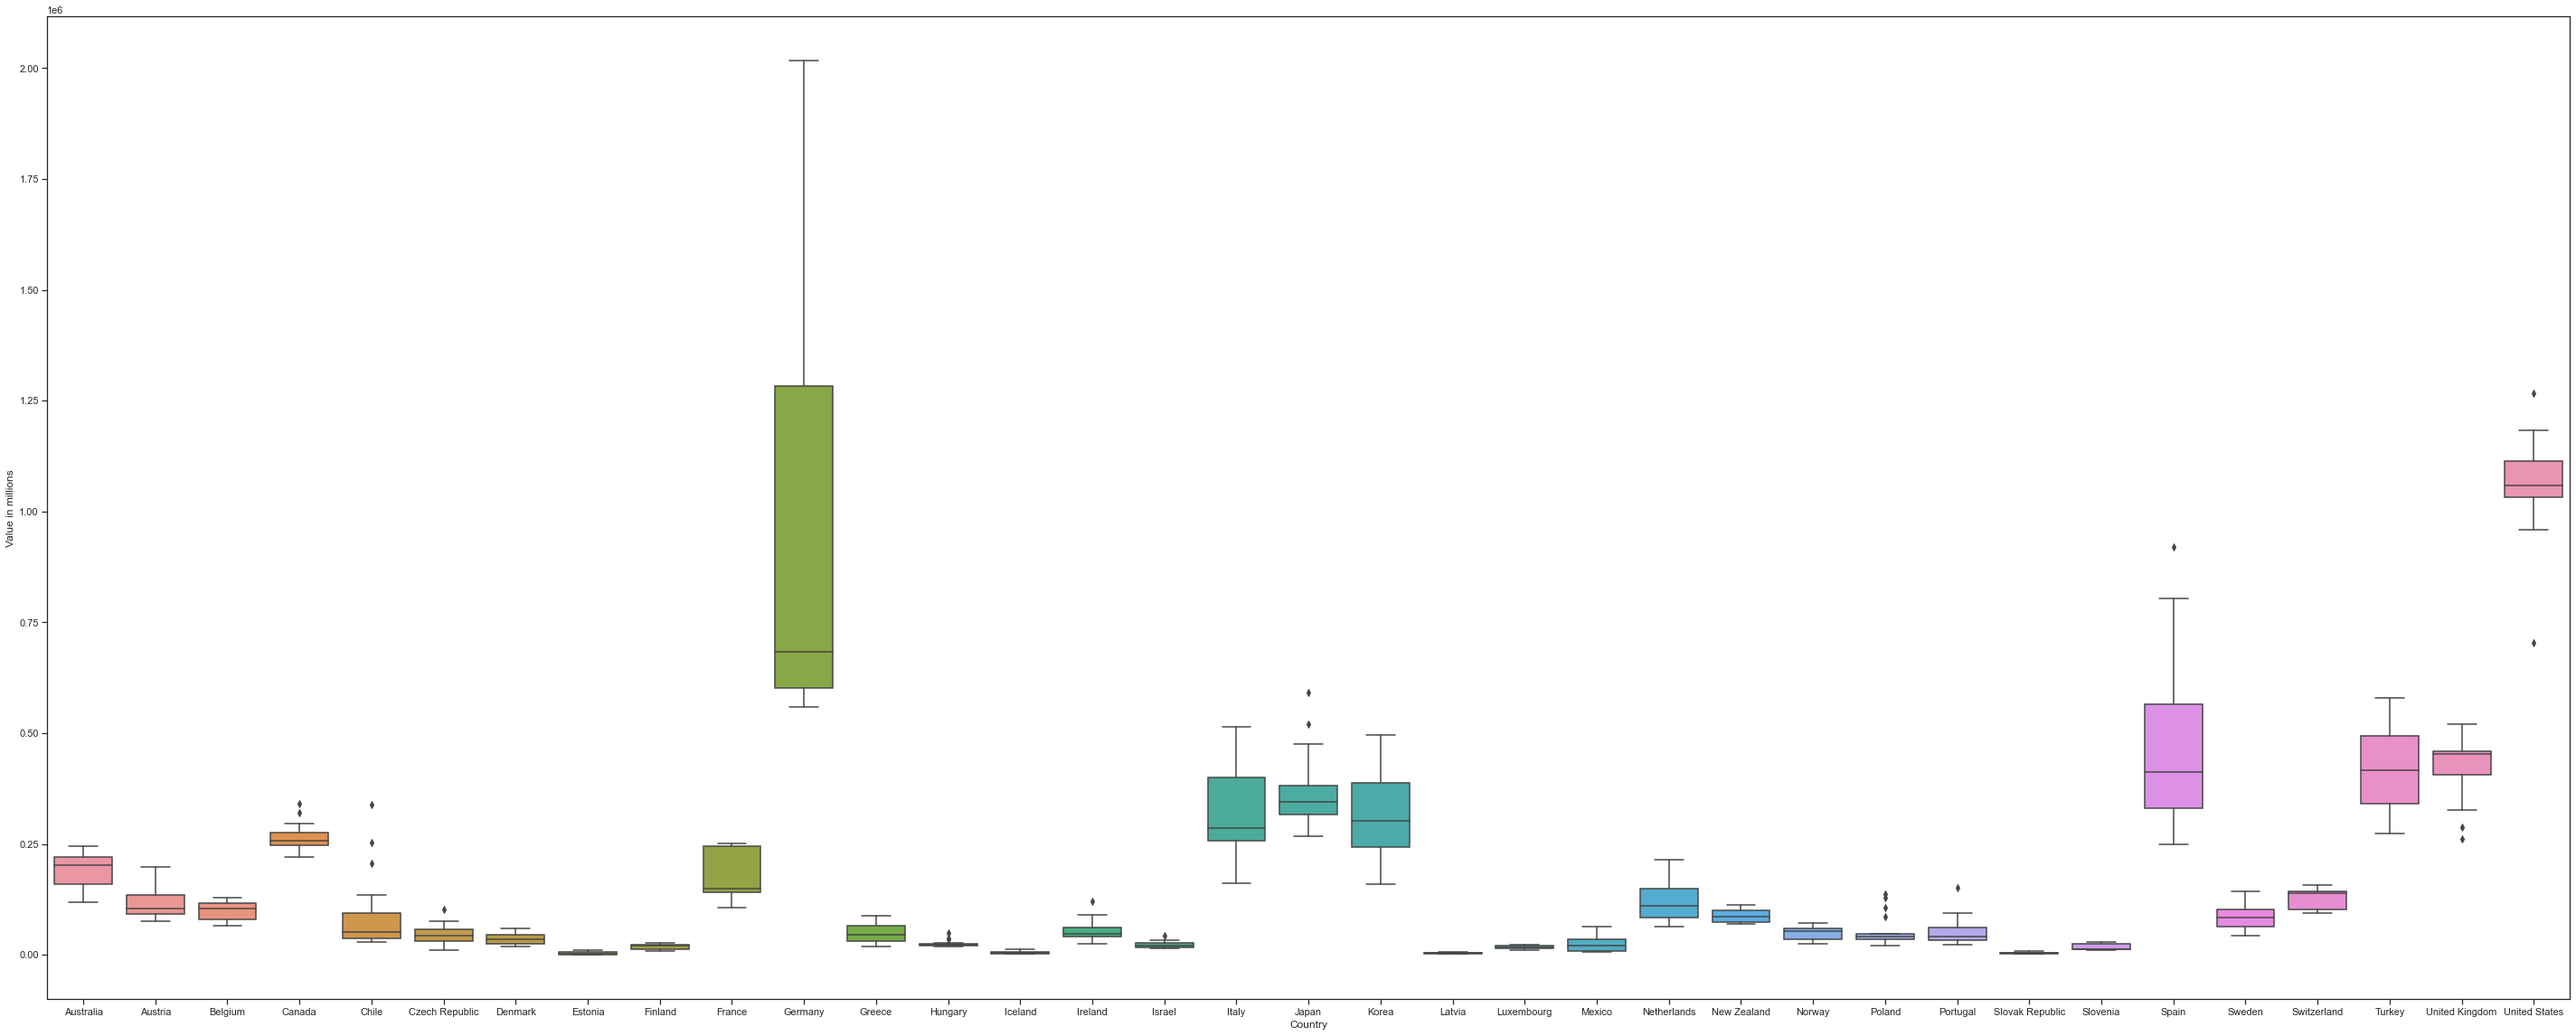

In [7]:
plt.rcParams["figure.figsize"] = [50,20]
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot( data = graph_migration_df_T )
plt.ylabel("Value in millions")

In [8]:
country_migration_df = migration_df
country_migration_df['Migration Inflows AVG'] = country_migration_df.filter(regex = "[^Country]").mean(1).astype("int")
country_migration_df

,Country,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Migration Inflows AVG
0,Australia,127877.0,119080.0,123411.0,146441.0,161734.0,176205.0,189490.0,203874.0,219400.0,202212.0,206362.0,235993.0,244849.0,233908.0,223654.0,218488,224220,186640,155817.0,189455
1,Austria,74786.0,86144.0,93341.0,104246.0,97995.0,82899.0,91546.0,94368.0,91660.0,96896.0,109921.0,125605.0,135228.0,154260.0,198658.0,158746,139329,131724,134966.0,115911
2,Belgium,65974.0,70230.0,68800.0,72446.0,77411.0,83433.0,93387.0,106012.0,102714.0,113582.0,117948.0,128948.0,117595.0,106345.0,128762.0,103187,109515,116768,NaN,99058
3,Canada,250640.0,228919.0,221349.0,235822.0,262244.0,251641.0,236751.0,247242.0,252170.0,280686.0,248701.0,257763.0,259034.0,260283.0,271808.0,296385,286485,321045,341175.0,263691
4,Chile,28924.0,29942.0,29835.0,32099.0,40793.0,37035.0,53071.0,43577.0,35892.0,41431.0,50651.0,65247.0,84352.0,83549.0,101911.0,135490,207200,339350,254080.0,89180
5,Czech Republic,11323.0,43648.0,57438.0,50804.0,58576.0,66125.0,102511.0,76151.0,38199.0,28046.0,20673.0,28607.0,27843.0,38490.0,31589.0,34808,43527,55872,63340.0,46187
6,Denmark,24642.0,21485.0,18385.0,18706.0,20146.0,23979.0,31430.0,37018.0,31957.0,33442.0,34572.0,35490.0,41342.0,49039.0,58695.0,54641,49046,45267,NaN,34960
7,Estonia,NaN,NaN,NaN,759.0,981.0,1488.0,1952.0,1929.0,2229.0,1199.0,1675.0,1107.0,1633.0,1347.0,7370.0,7693,9067,9711,10994.0,3820
8,Finland,11037.0,9972.0,9432.0,11511.0,12744.0,13868.0,17504.0,19906.0,18087.0,18212.0,20416.0,23334.0,23873.0,23647.0,21414.0,27274,23735,23146,24178.0,18594
9,France,106877.0,124232.0,136370.0,141554.0,135866.0,228693.0,145876.0,146964.0,149603.0,145831.0,142125.0,151599.0,251299.0,251767.0,242707.0,245663,245902,248916,NaN,180102


In [9]:
country_migration_df = migration_df[['Country', 'Migration Inflows AVG']]
country_migration_df

,Country,Migration Inflows AVG
0,Australia,189455
1,Austria,115911
2,Belgium,99058
3,Canada,263691
4,Chile,89180
5,Czech Republic,46187
6,Denmark,34960
7,Estonia,3820
8,Finland,18594
9,France,180102


In [10]:
country_name_spanish = ["Australia", "Austria", "Bélgica", "Canadá", "Chile", "República Checa", "Dinamarca", "Estonia","Finlandia","Francia","Alemania","Grecia","Hungría","Islandia","Irlanda","Israel","Italia","Japón","Corea del Sur","Letonia","Luxemburgo","México","Países Bajos","Nueva Zelanda","Noruega","Polonia","Portugal","Eslovaquia","Eslovenia","España","Suecia","Suiza","Turquía","Reino Unido","Estados Unidos"]
contry_names = {
    'Spanish' : country_name_spanish,
    'English' : ["Australia", "Austria", "Belgium", "Canada", "Chile", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom", "United States"]
}

#len(country_name_spanish)

contry_names_df = pd.DataFrame(contry_names)
contry_names_df

,Spanish,English
0,Australia,Australia
1,Austria,Austria
2,Bélgica,Belgium
3,Canadá,Canada
4,Chile,Chile
5,República Checa,Czech Republic
6,Dinamarca,Denmark
7,Estonia,Estonia
8,Finlandia,Finland
9,Francia,France


In [11]:
generic_data_df = pd.DataFrame()
generic_data_df.shape

(0, 0)

In [12]:
generic_data_df = pd.merge(contry_names_df, country_migration_df, left_on='English', right_on='Country').drop(columns= ['Country'])
generic_data_df

,Spanish,English,Migration Inflows AVG
0,Australia,Australia,189455
1,Austria,Austria,115911
2,Bélgica,Belgium,99058
3,Canadá,Canada,263691
4,Chile,Chile,89180
5,República Checa,Czech Republic,46187
6,Dinamarca,Denmark,34960
7,Estonia,Estonia,3820
8,Finlandia,Finland,18594
9,Francia,France,180102


### Countries by GDP (PPP) per capita (according to the International Monetary)

In [13]:
pbi_website_html = requests.get('https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(PPA)_per_c%C3%A1pita').text
soup = BeautifulSoup(pbi_website_html, 'html.parser')
#print(soup.prettify())

pbi_table = soup.find('table',{'class':'sortable wikitable'})
pbi_table_df = pd.read_html(str(pbi_table))[0]
pbi_table_df.shape

(184, 3)

In [14]:
pbi_table_df.columns

Index(['Pos.', 'País', 'Dólaresinter-nacionales'], dtype='object')

In [15]:
pbi_table_df.columns=['Position','Country','International Dollars']
pbi_table_df.columns

Index(['Position', 'Country', 'International Dollars'], dtype='object')

In [16]:
pbi_table_result_df = pbi_table_df[ pbi_table_df["Country"].isin(country_name_spanish)].sort_values("Country")
pbi_table_result_df = pbi_table_result_df.drop(columns= ['Position'])
print(pbi_table_result_df.shape)
pbi_table_result_df

(35, 2)


,Country,International Dollars
16,Alemania,56 956
18,Australia,54 891
15,Austria,57 891
19,Bélgica,53 973
21,Canadá,51 713
58,Chile,24 948
26,Corea del Sur,47 027
10,Dinamarca,61 478
43,Eslovaquia,34 815
36,Eslovenia,40 820


In [17]:
generic_data_df1 = pd.merge(generic_data_df, pbi_table_result_df, left_on='Spanish', right_on='Country').drop(columns= ['Country'])
generic_data_df1 = generic_data_df1.rename(columns = {'International Dollars':'GDP'})
generic_data_df1

,Spanish,English,Migration Inflows AVG,GDP
0,Australia,Australia,189455,54 891
1,Austria,Austria,115911,57 891
2,Bélgica,Belgium,99058,53 973
3,Canadá,Canada,263691,51 713
4,Chile,Chile,89180,24 948
5,República Checa,Czech Republic,46187,42 956
6,Dinamarca,Denmark,34960,61 478
7,Estonia,Estonia,3820,39 729
8,Finlandia,Finland,18594,51 867
9,Francia,France,180102,49 492


Text(0, 0.5, 'Countries')

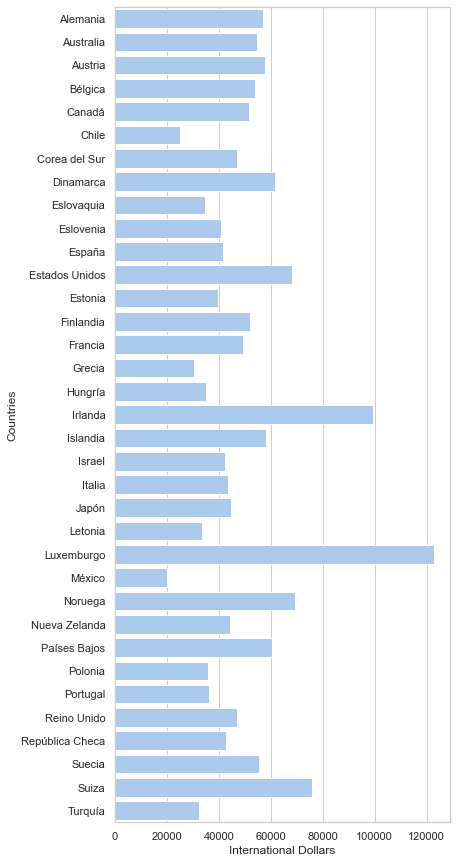

In [18]:

graph_pbi_table_df = pbi_table_result_df.copy()
#graph_pbi_table_df = graph_pbi_table_df.drop('Position', axis=1)
graph_pbi_table_df['International Dollars'] = graph_pbi_table_df['International Dollars'].apply(remove_whitespace)
graph_pbi_table_df['International Dollars'] = graph_pbi_table_df['International Dollars'].astype('int')
#graph_pbi_table_df

sns.set_theme(style="whitegrid")
fig_pbi, ax_pbi = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="International Dollars", y="Country", data=graph_pbi_table_df, label="Total", color="b")
plt.ylabel("Countries")

### Evolution of average annual wages 2000-2019 (PPP in US dollars)

In [19]:
salary_website_html = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_average_wage').text

soup = BeautifulSoup(salary_website_html,'html.parser')
#print(soup.prettify())
salary_med = soup.find('table',{'class':'wikitable sortable static-row-numbers plainrowheaders srn-white-background'})
salary_med_df = pd.read_html(str(salary_med ))[0]

salary_med_df['Country'] = salary_med_df['Country'].str.replace(' (more)', '', regex=False)
salary_med_df.loc[salary_med_df.Country == "South Korea", 'Country'] = 'Korea'
salary_med_df.loc[salary_med_df.Country == "Slovakia", 'Country'] = 'Slovak Republic'
salary_med_df

,Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Luxembourg,53337,55564,59860,58817,58486,58813,59928,61975,62091,63062,69556,68681
1,Iceland,45708,52385,44558,46774,46953,47910,48234,51759,56094,61787,70003,68006
2,Switzerland,54405,57535,60400,60503,61567,62516,62616,62495,62370,62283,66121,66567
3,United States,52801,55391,58054,58200,58669,58412,59250,60692,60686,60558,64397,65836
4,Denmark,41713,45783,49424,49148,40024,49424,50369,51126,52808,56227,56828,57150
5,Netherlands,47695,49939,53023,52668,52781,52808,52602,53171,53295,52877,56709,56552
6,Belgium,47950,48688,48941,49382,49715,50363,50583,50249,50041,49675,55066,55590
7,Australia,42702,45016,48112,49622,49901,49649,49989,49563,49603,49126,54147,54401
8,Norway,36378,41679,47310,48897,50227,51236,51415,51663,50825,51212,53485,54027
9,Austria,45188,46963,49316,48809,49047,49120,49299,49965,50330,50349,53561,53903


<AxesSubplot:ylabel='Country'>

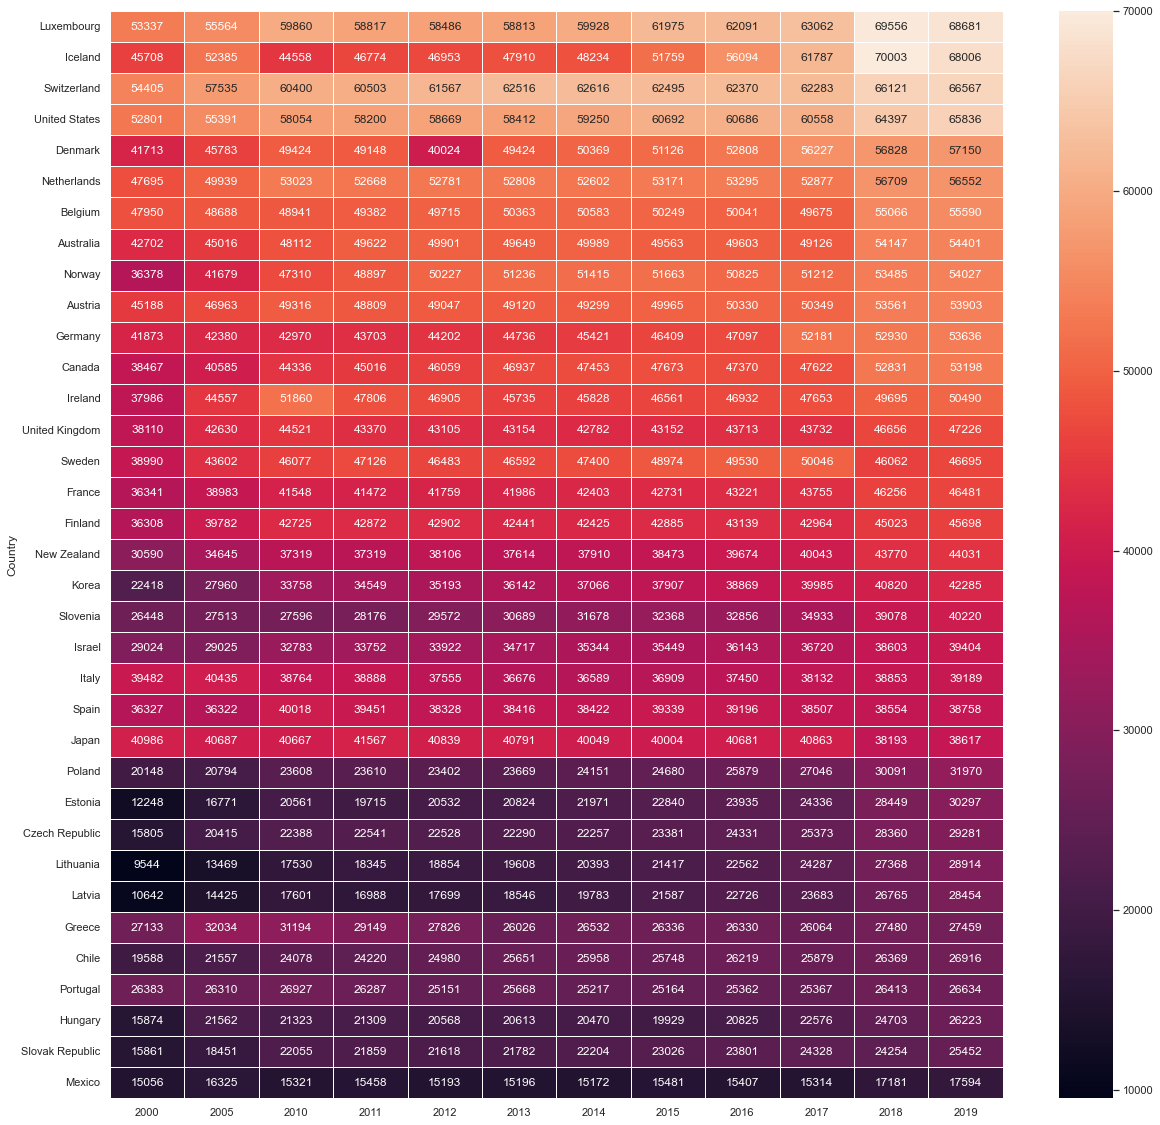

In [20]:

graph_salary_med_df = salary_med_df.copy()
graph_salary_med_df = graph_salary_med_df.set_index('Country',inplace=False)

sns.set_theme()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(graph_salary_med_df, annot=True, fmt="d", linewidths=.5, ax=ax)


In [21]:
salary_med_avg_df = salary_med_df.copy()
salary_med_avg_df['Average Wages'] = salary_med_avg_df.filter(regex = "[^Country]").mean(1)
salary_med_avg_df

,Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average Wages
0,Luxembourg,53337,55564,59860,58817,58486,58813,59928,61975,62091,63062,69556,68681,60847.500000
1,Iceland,45708,52385,44558,46774,46953,47910,48234,51759,56094,61787,70003,68006,53347.583333
2,Switzerland,54405,57535,60400,60503,61567,62516,62616,62495,62370,62283,66121,66567,61614.833333
3,United States,52801,55391,58054,58200,58669,58412,59250,60692,60686,60558,64397,65836,59412.166667
4,Denmark,41713,45783,49424,49148,40024,49424,50369,51126,52808,56227,56828,57150,50002.000000
5,Netherlands,47695,49939,53023,52668,52781,52808,52602,53171,53295,52877,56709,56552,52843.333333
6,Belgium,47950,48688,48941,49382,49715,50363,50583,50249,50041,49675,55066,55590,50520.250000
7,Australia,42702,45016,48112,49622,49901,49649,49989,49563,49603,49126,54147,54401,49319.250000
8,Norway,36378,41679,47310,48897,50227,51236,51415,51663,50825,51212,53485,54027,49029.500000
9,Austria,45188,46963,49316,48809,49047,49120,49299,49965,50330,50349,53561,53903,49654.166667


In [22]:
#generic_data_df = []
merge_salary_med_avg_df = salary_med_avg_df[['Country','Average Wages']]
merge_salary_med_avg_df
generic_data_df2 = pd.merge(generic_data_df1, merge_salary_med_avg_df, left_on='English', right_on='Country').drop(columns= ['Country'])
generic_data_df2

,Spanish,English,Migration Inflows AVG,GDP,Average Wages
0,Australia,Australia,189455,54 891,49319.250000
1,Austria,Austria,115911,57 891,49654.166667
2,Bélgica,Belgium,99058,53 973,50520.250000
3,Canadá,Canada,263691,51 713,46462.250000
4,Chile,Chile,89180,24 948,24763.583333
5,República Checa,Czech Republic,46187,42 956,23245.833333
6,Dinamarca,Denmark,34960,61 478,50002.000000
7,Estonia,Estonia,3820,39 729,21873.250000
8,Finlandia,Finland,18594,51 867,42430.333333
9,Francia,France,180102,49 492,42244.666667


In [23]:
life_expectancy_website_html = requests.get('https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_esperanza_de_vida').text
soup = BeautifulSoup(life_expectancy_website_html,'html.parser')
#print(soup.prettify())

life_expectancy_table= soup.find('table',{'class':'wikitable sortable'})
life_expectancy_df=pd.read_html(str(life_expectancy_table ))[0]

life_expectancy_df = life_expectancy_df[ life_expectancy_df["País"].isin(country_name_spanish)].sort_values("País")
life_expectancy_df.shape

(34, 4)

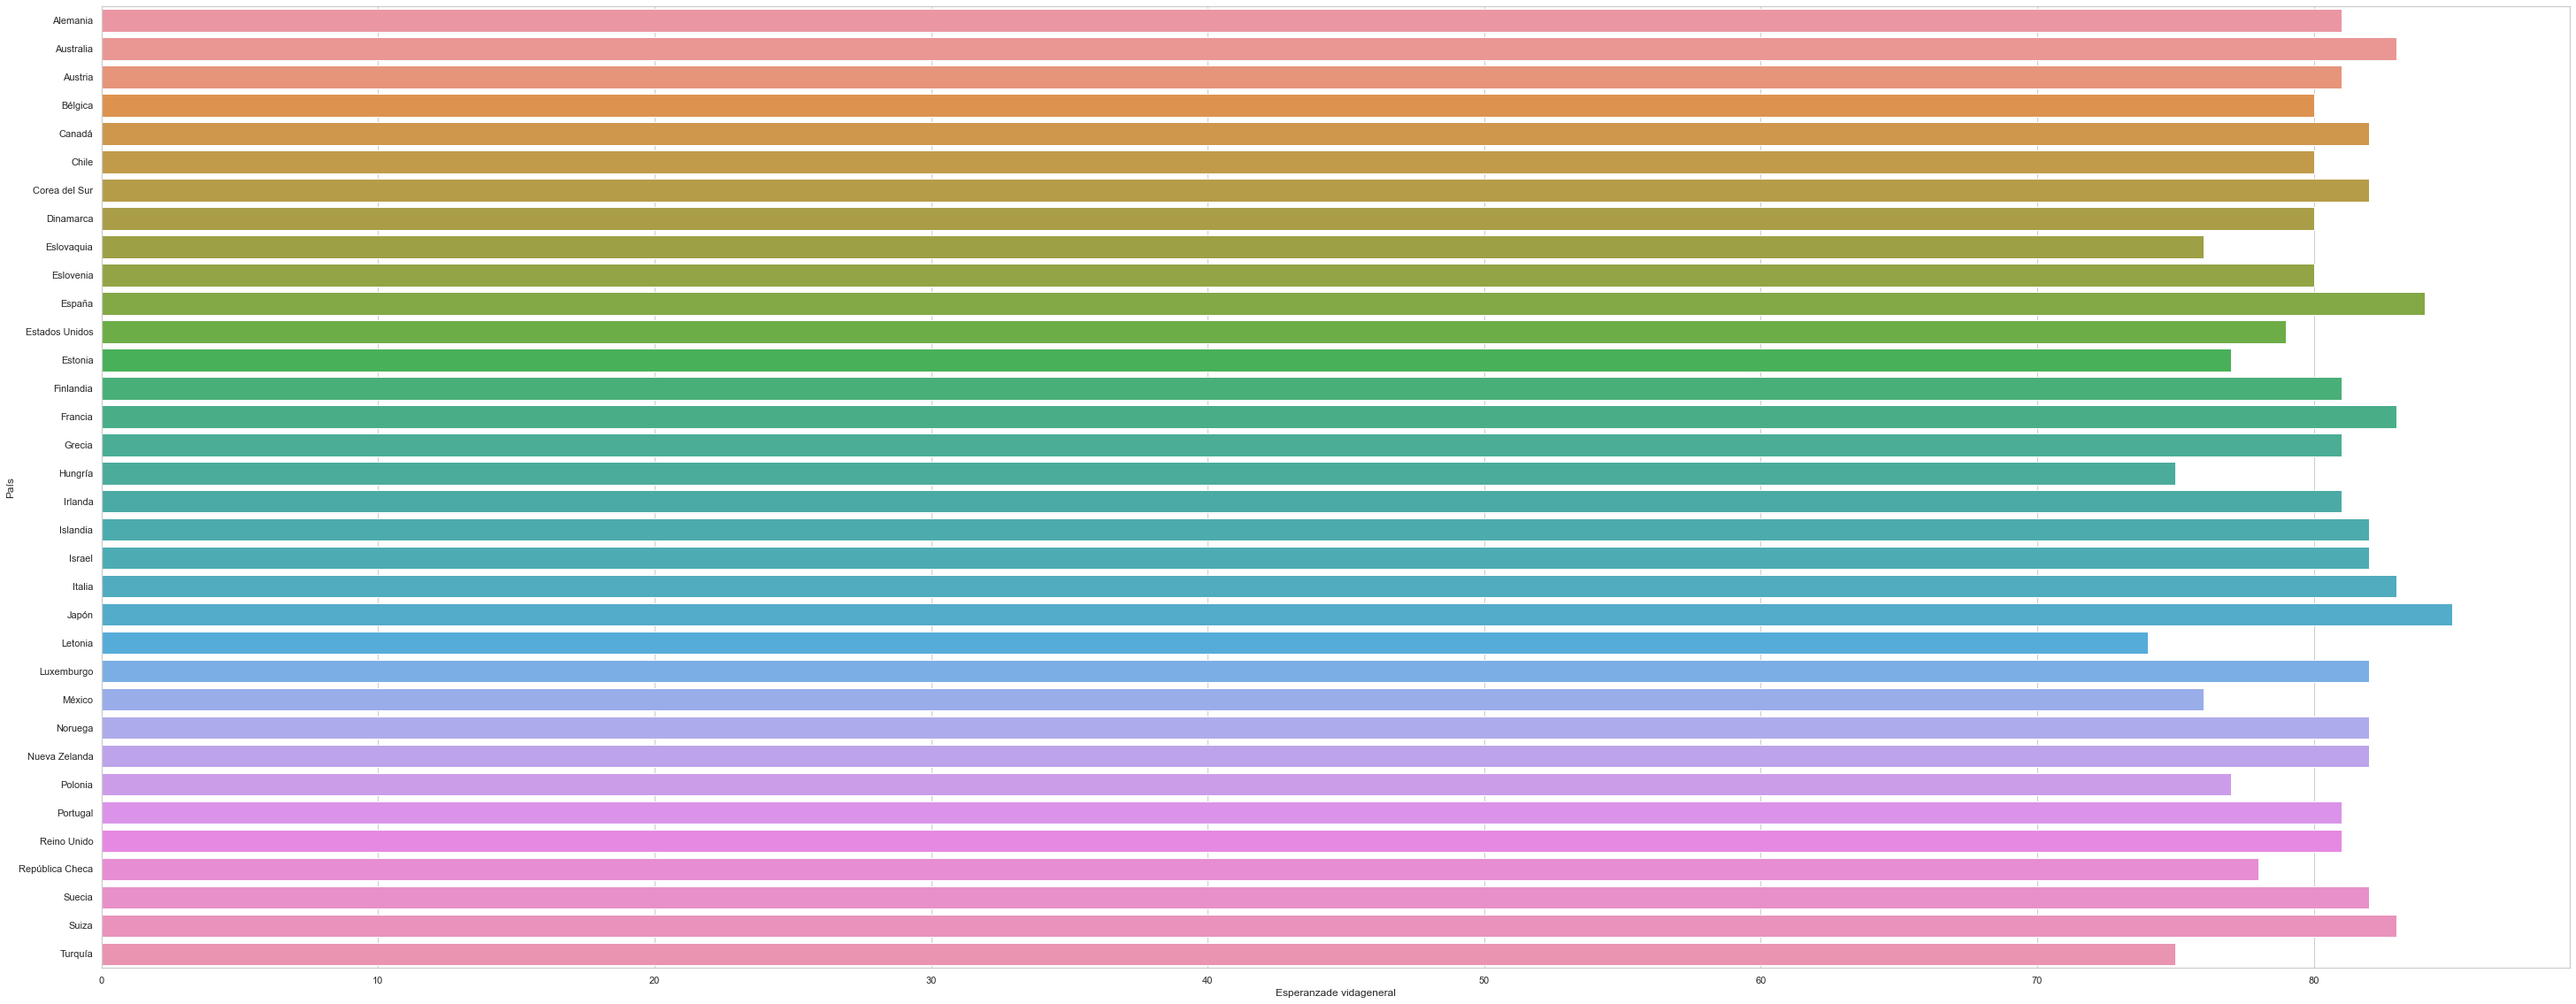

In [24]:
life_expectancy_graph_df = life_expectancy_df[['País','Esperanzade vidageneral']]
#life_expectancy_graph_df = life_expectancy_graph_df.set_index('País',inplace=False)
#life_expectancy_graph_df

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Esperanzade vidageneral", y="País", data=life_expectancy_graph_df)

In [25]:
generic_data_df3 = pd.merge(generic_data_df2, life_expectancy_graph_df, left_on='Spanish', right_on='País').drop(columns= ['País'])
generic_data_df3

,Spanish,English,Migration Inflows AVG,GDP,Average Wages,Esperanzade vidageneral
0,Australia,Australia,189455,54 891,49319.250000,83
1,Austria,Austria,115911,57 891,49654.166667,81
2,Bélgica,Belgium,99058,53 973,50520.250000,80
3,Canadá,Canada,263691,51 713,46462.250000,82
4,Chile,Chile,89180,24 948,24763.583333,80
5,República Checa,Czech Republic,46187,42 956,23245.833333,78
6,Dinamarca,Denmark,34960,61 478,50002.000000,80
7,Estonia,Estonia,3820,39 729,21873.250000,77
8,Finlandia,Finland,18594,51 867,42430.333333,81
9,Francia,France,180102,49 492,42244.666667,83


### Health Care Costs By Country 2021

In [26]:
health_care_cost_website_html = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita').text
soup = BeautifulSoup(health_care_cost_website_html, 'html.parser')
#print(soup.prettify())

health_care_cost_website_table = soup.find('table',{'class':'wikitable sortable static-row-numbers plainrowheaders srn-white-background'})
health_care_cost_df = pd.read_html(str(health_care_cost_website_table))[0]
health_care_cost_df = health_care_cost_df[ health_care_cost_df["Country"].isin(contry_names['English'])].sort_values("Country")
health_care_cost_df

,Country,2017,2018,2019
0,Australia,4711,4965,5187
1,Austria,5360,5538,5851
2,Belgium,5014,5103,5428
3,Canada,5155,5287,5418
4,Chile,2030,2126,2159
6,Czech Republic,2891,3171,3428
7,Denmark,5107,5295,5568
8,Estonia,2217,2368,2579
9,Finland,4222,4331,4578
10,France,5057,5154,5376


In [27]:
health_care_cost_avg_df = health_care_cost_df.copy()
#health_care_cost_avg_df = health_care_cost_avg_df.set_index('Country', inplace=False)
health_care_cost_avg_df['Health Care Costs AVG'] = health_care_cost_avg_df.mean(axis=1, numeric_only=True)
print(health_care_cost_avg_df.shape)
health_care_cost_avg_df

(34, 5)


,Country,2017,2018,2019,Health Care Costs AVG
0,Australia,4711,4965,5187,4954.333333
1,Austria,5360,5538,5851,5583.000000
2,Belgium,5014,5103,5428,5181.666667
3,Canada,5155,5287,5418,5286.666667
4,Chile,2030,2126,2159,2105.000000
6,Czech Republic,2891,3171,3428,3163.333333
7,Denmark,5107,5295,5568,5323.333333
8,Estonia,2217,2368,2579,2388.000000
9,Finland,4222,4331,4578,4377.000000
10,France,5057,5154,5376,5195.666667


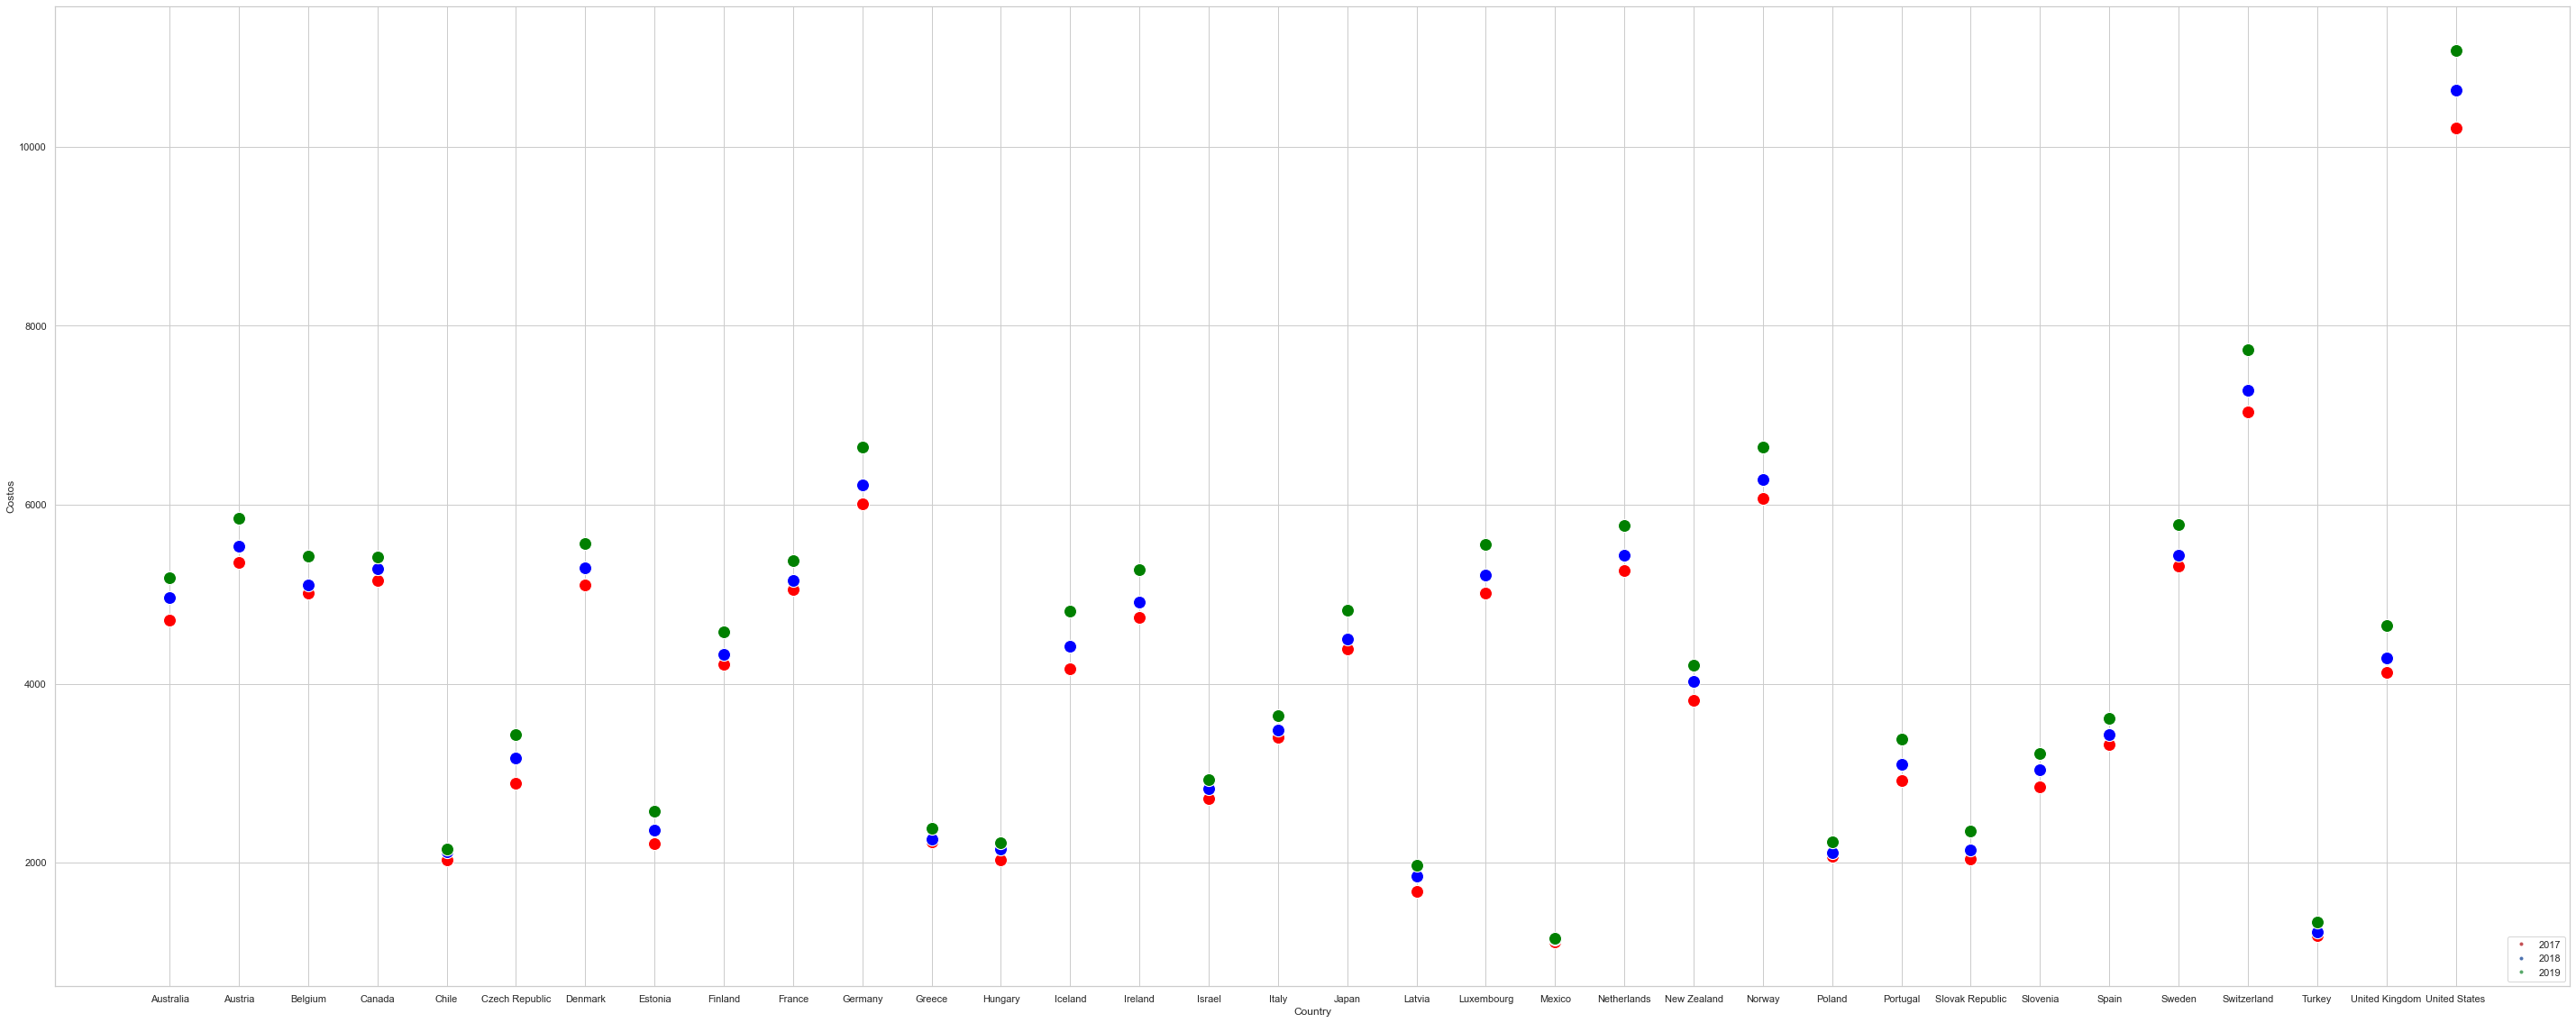

In [28]:
from matplotlib.lines import Line2D

health_care_cost_graph_df = health_care_cost_df.copy()
#health_care_cost_graph_df = health_care_cost_graph_df.set_index('Country', inplace=False)

sns.scatterplot(data=health_care_cost_df, x="Country", y='2017', s=200, cmap='gray', c=['red'])
sns.scatterplot(data=health_care_cost_df, x="Country", y='2018', s=200, cmap='gray', c=['blue'])
sns.scatterplot(data=health_care_cost_df, x="Country", y='2019', s=200, cmap='gray', c=['green'])

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None')]
plt.legend(custom, ['2017', '2018','2019'], loc='lower right')

sns.set(style='whitegrid')
plt.ylabel("Costos")
plt.show()

In [29]:

data_to_merge = health_care_cost_avg_df[['Country', 'Health Care Costs AVG' ]]

merge = generic_data_df3.copy()
generic_data_df4 = pd.merge(merge, data_to_merge, left_on='English', right_on='Country').drop(columns= ['Country'])
generic_data_df4

,Spanish,English,Migration Inflows AVG,GDP,Average Wages,Esperanzade vidageneral,Health Care Costs AVG
0,Australia,Australia,189455,54 891,49319.250000,83,4954.333333
1,Austria,Austria,115911,57 891,49654.166667,81,5583.000000
2,Bélgica,Belgium,99058,53 973,50520.250000,80,5181.666667
3,Canadá,Canada,263691,51 713,46462.250000,82,5286.666667
4,Chile,Chile,89180,24 948,24763.583333,80,2105.000000
5,República Checa,Czech Republic,46187,42 956,23245.833333,78,3163.333333
6,Dinamarca,Denmark,34960,61 478,50002.000000,80,5323.333333
7,Estonia,Estonia,3820,39 729,21873.250000,77,2388.000000
8,Finlandia,Finland,18594,51 867,42430.333333,81,4377.000000
9,Francia,France,180102,49 492,42244.666667,83,5195.666667


### List of countries by intentional homicide rate (Intentional homicide victims per 100,000 inhabitants. From UNODC.)

In [30]:
homicide_rate_website_html = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate').text
soup = BeautifulSoup(homicide_rate_website_html, 'html.parser')
#print(soup.prettify())
homicide_rate_table = soup.find('table',{'class':'wikitable sortable static-row-numbers plainrowheaders srn-white-background'})
homicide_rate_df = pd.read_html(str(homicide_rate_table ))[0]

homicide_rate_df['Country or subnational area'] = homicide_rate_df['Country or subnational area'].str.replace(' (more)', '', regex=False)

homicide_rate_df = homicide_rate_df[ homicide_rate_df["Country or subnational area"].isin(contry_names['English']) ].sort_values("Country or subnational area").drop(columns= ['Subregion', 'Region','Count','Year listed'])
homicide_rate_df.columns = ['Country','Rate']
homicide_rate_df = homicide_rate_df.rename(columns = {'Rate':'Homicide Rate'})
homicide_rate_df

,Country,Homicide Rate
212,Australia,0.89
203,Austria,0.97
204,Belgium,1.70
91,Canada,1.76
98,Chile,4.40
163,Czech Republic,0.60
172,Denmark,1.01
173,Estonia,2.12
174,Finland,1.63
205,France,1.20


Text(0, 0.5, 'Countries')

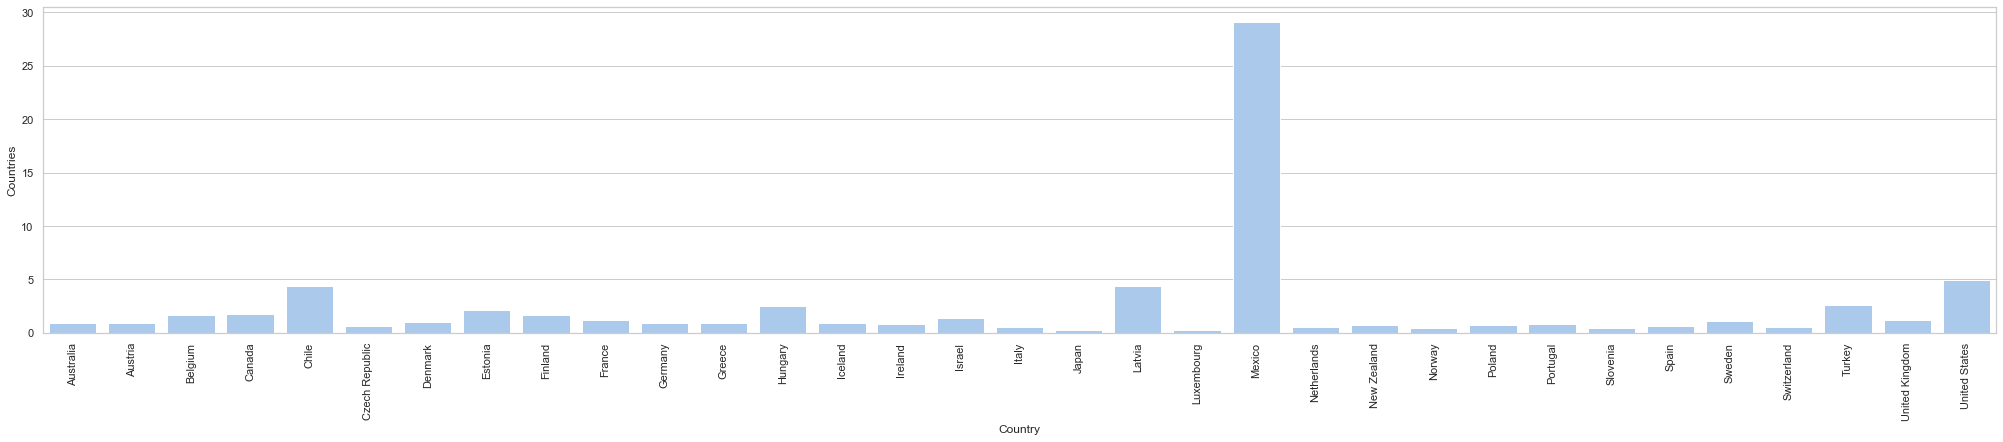

In [31]:
sns.set_theme(style="whitegrid")
fig_homc_rate, ax_homc_rate= plt.subplots(figsize=(35, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Country", y="Homicide Rate", data=homicide_rate_df, label="Total", color="b")
ax_homc_rate.tick_params(axis='x', rotation=90)
plt.ylabel("Countries")

In [32]:
data_to_merge3 = homicide_rate_df.copy()
merge5 = generic_data_df4.copy()

generic_data_df5 = pd.merge(merge5, data_to_merge3, left_on='English', right_on='Country').drop(columns= ['Country'])
generic_data_df5["GDP"] = generic_data_df5["GDP"].apply(remove_whitespace)
generic_data_df5

,Spanish,English,Migration Inflows AVG,GDP,Average Wages,Esperanzade vidageneral,Health Care Costs AVG,Homicide Rate
0,Australia,Australia,189455,54891,49319.250000,83,4954.333333,0.89
1,Austria,Austria,115911,57891,49654.166667,81,5583.000000,0.97
2,Bélgica,Belgium,99058,53973,50520.250000,80,5181.666667,1.70
3,Canadá,Canada,263691,51713,46462.250000,82,5286.666667,1.76
4,Chile,Chile,89180,24948,24763.583333,80,2105.000000,4.40
5,República Checa,Czech Republic,46187,42956,23245.833333,78,3163.333333,0.60
6,Dinamarca,Denmark,34960,61478,50002.000000,80,5323.333333,1.01
7,Estonia,Estonia,3820,39729,21873.250000,77,2388.000000,2.12
8,Finlandia,Finland,18594,51867,42430.333333,81,4377.000000,1.63
9,Francia,France,180102,49492,42244.666667,83,5195.666667,1.20


In [33]:
def z_score(datafram):
    # copy the dataframe
    df_std = datafram.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [34]:
generic_data_df5_copy = generic_data_df5.copy()
dataframe_to_normalize = generic_data_df5_copy.filter(regex = "[^Spanish, English]").astype(float)
normalized_data = z_score(dataframe_to_normalize)
normalized_data['Spanish'] = generic_data_df5_copy['Spanish']
normalized_data['English'] = generic_data_df5_copy['English']

normalized_data = normalized_data[['Spanish', 'English', 'Migration Inflows AVG', 'GDP', 'Average Wages', 'Esperanzade vidageneral', 'Health Care Costs AVG', 'Homicide Rate']]
normalized_data

,Spanish,English,Migration Inflows AVG,GDP,Average Wages,Esperanzade vidageneral,Health Care Costs AVG,Homicide Rate
0,Australia,Australia,0.073497,0.174421,0.760048,0.933406,0.346188,-0.267228
1,Austria,Austria,-0.214889,0.320321,0.786040,0.161790,0.671563,-0.251591
2,Bélgica,Belgium,-0.280974,0.129776,0.853254,-0.224017,0.463848,-0.108897
3,Canadá,Canada,0.364597,0.019864,0.538325,0.547598,0.518192,-0.097168
4,Chile,Chile,-0.319708,-1.281807,-1.145642,-0.224017,-1.128521,0.418876
5,República Checa,Czech Republic,-0.488296,-0.406018,-1.263430,-0.995633,-0.580767,-0.323915
6,Dinamarca,Denmark,-0.532320,0.494769,0.813034,-0.224017,0.537169,-0.243772
7,Estonia,Estonia,-0.654428,-0.562958,-1.369952,-1.381441,-0.982050,-0.026799
8,Finlandia,Finland,-0.596495,0.027354,0.225420,0.161790,0.047382,-0.122580
9,Francia,France,0.036821,-0.088150,0.211011,0.933406,0.471094,-0.206632


In [35]:
col_mig_av = normalized_data["Migration Inflows AVG"].astype(float) 
col_gdp = normalized_data["GDP"].astype(float)
col_avg_wages = normalized_data["Average Wages"].astype(float) 
col_liv_Expt = normalized_data["Esperanzade vidageneral"].astype(float)
col_healt_care = normalized_data["Health Care Costs AVG"].astype(float)
col_homicide = normalized_data["Homicide Rate"].astype(float)

#test_df = pd.DataFrame()
final_data_ranking = normalized_data.copy()
final_data_ranking['Rank'] = (col_mig_av + col_gdp + col_avg_wages + col_liv_Expt - col_healt_care - col_homicide ).astype(int).rank(method='dense', ascending=False).astype(int)

#cols = list(test_df.columns.values)
#print(cols)

final_data_ranking = final_data_ranking[['Spanish', 'English', 'Rank', 'Migration Inflows AVG', 'GDP', 'Average Wages', 'Esperanzade vidageneral', 'Health Care Costs AVG', 'Homicide Rate']]
final_data_ranking

,Spanish,English,Rank,Migration Inflows AVG,GDP,Average Wages,Esperanzade vidageneral,Health Care Costs AVG,Homicide Rate
0,Australia,Australia,4,0.073497,0.174421,0.760048,0.933406,0.346188,-0.267228
1,Austria,Austria,5,-0.214889,0.320321,0.786040,0.161790,0.671563,-0.251591
2,Bélgica,Belgium,5,-0.280974,0.129776,0.853254,-0.224017,0.463848,-0.108897
3,Canadá,Canada,4,0.364597,0.019864,0.538325,0.547598,0.518192,-0.097168
4,Chile,Chile,7,-0.319708,-1.281807,-1.145642,-0.224017,-1.128521,0.418876
5,República Checa,Czech Republic,7,-0.488296,-0.406018,-1.263430,-0.995633,-0.580767,-0.323915
6,Dinamarca,Denmark,5,-0.532320,0.494769,0.813034,-0.224017,0.537169,-0.243772
7,Estonia,Estonia,7,-0.654428,-0.562958,-1.369952,-1.381441,-0.982050,-0.026799
8,Finlandia,Finland,5,-0.596495,0.027354,0.225420,0.161790,0.047382,-0.122580
9,Francia,France,5,0.036821,-0.088150,0.211011,0.933406,0.471094,-0.206632


Text(0, 0.5, 'Countries')

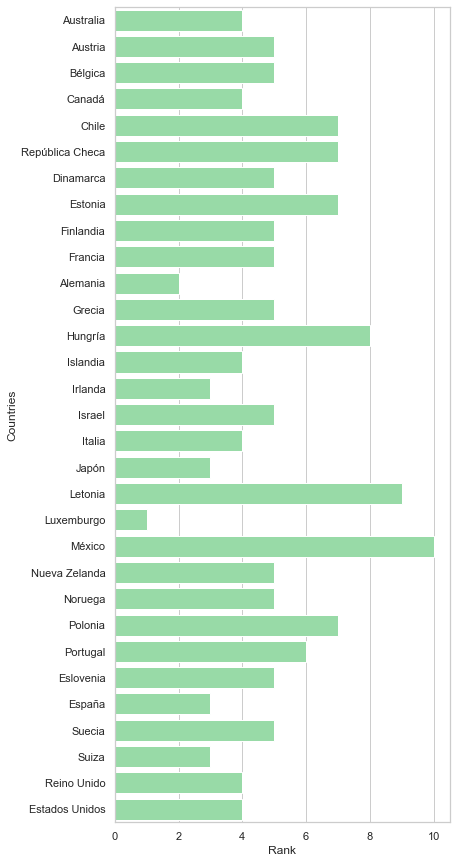

In [49]:
graph_data_ranking_df = final_data_ranking.copy()
graph_data_ranking_df['English'] = graph_data_ranking_df['Rank'].apply(remove_whitespace)
graph_data_ranking_df['English'] = graph_data_ranking_df['Rank'].astype('int')
#graph_data_ranking_df

sns.set_theme(style="whitegrid")
fig_pbi, ax_pbi = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Rank", y="Spanish", data=graph_data_ranking_df , label="Total", color="g")
plt.ylabel("Countries")